In [49]:
from pykrx import stock
import FinanceDataReader as fdr
#stock.DataFrame('58GQ44')
#stock.get_market_ohlcv('58GQ44')
#stock.get_market_ticker_list("2022-01-04")

In [50]:
import main as m
import pandas as pd
import numpy as np
import pymysql.cursors
ticker_list2 = ['005930', '003490', '066570', '000660', '005380', '017670', '051910', '001040']
ticker_list = ['005930', '003490', '066570']

for i in ticker_list:
    print(stock.get_market_ticker_name(i))

conn = pymysql.connect(host='192.168.35.227', user= 'user', db='database1', password='New^york6')
cursor = conn.connect()
sql = """SELECT 종목명, 종가, CALLPUT, 행사가격 FROM ELW WHERE 기초자산명 = '{}' AND 거래일자 = '2022-01-04' AND 종가!=0;"""
port = m.Portfolio(risk_aversion=0.1)

for i in range(len(ticker_list)):
    tmp = m.Stock(ticker_list[i])
    port.add(tmp)
    df = pd.read_sql(sql.format(stock.get_market_ticker_name(ticker_list[i])), conn)
    for j in range(len(df.index)):
        tmp_d = m.Derivative(tmp, df['CALLPUT'].iloc[j],df['종목명'].iloc[j], df['행사가격'].iloc[j], df['종가'].iloc[j])
        port.add(tmp_d)

삼성전자
대한항공
LG전자
Stock 005930 is successfully inserted
Derivatives 신한G141삼성전자콜 is successfully inserted
Derivatives 신한G142삼성전자콜 is successfully inserted
Derivatives 신한G197삼성전자콜 is successfully inserted
Derivatives 신한G143삼성전자콜 is successfully inserted
Derivatives 신한G199삼성전자콜 is successfully inserted
Derivatives 신한G084삼성전자풋 is successfully inserted
Derivatives 신한G144삼성전자풋 is successfully inserted
Derivatives 신한G145삼성전자풋 is successfully inserted
Derivatives 신한G200삼성전자풋 is successfully inserted
Derivatives 신한G146삼성전자풋 is successfully inserted
Derivatives 신한G202삼성전자풋 is successfully inserted
Derivatives 신한G203삼성전자풋 is successfully inserted
Derivatives 신한G205삼성전자풋 is successfully inserted
Derivatives 미래GK69삼성전자콜 is successfully inserted
Derivatives 미래GN14삼성전자콜 is successfully inserted
Derivatives 미래GQ46삼성전자콜 is successfully inserted
Derivatives 미래GK70삼성전자콜 is successfully inserted
Derivatives 미래GN15삼성전자콜 is successfully inserted
Derivatives 미래GQ47삼성전자콜 is successfully inserted
Derivatives 미래G5

In [52]:
port.fit()
"""
print(np.sum(port.weight_stock))
print(np.sum(port.weight_derivative))
"""
port.weight_derivative

array([[0.00055451],
       [0.00055395],
       [0.00055307],
       [0.00055647],
       [0.00055373],
       [0.00055187],
       [0.00055189],
       [0.00055188],
       [0.00055212],
       [0.00055198],
       [0.00055241],
       [0.00055274],
       [0.00055321],
       [0.00055546],
       [0.00055707],
       [0.00055313],
       [0.00055386],
       [0.00055668],
       [0.00055532],
       [0.00055184],
       [0.00055278],
       [0.0005536 ],
       [0.00055435],
       [0.00055351],
       [0.00055486],
       [0.00055619],
       [0.00055196],
       [0.00055275],
       [0.00055273],
       [0.00055405],
       [0.00055346],
       [0.00055237],
       [0.00055528],
       [0.00055591],
       [0.00055221],
       [0.00055323],
       [0.00055399],
       [0.00055309],
       [0.00055219],
       [0.00055354],
       [0.00055389],
       [0.0005518 ],
       [0.00055193],
       [0.00055235],
       [0.00055372],
       [0.0005518 ],
       [0.00055185],
       [0.000

In [47]:
import progressbar
stock_ratio = []
derivative_ratio = []

bar = progressbar.ProgressBar()
p = np.round([i/10 for i in np.arange(0,10,0.5)],2)
for i in bar(range(len(p))):
    port.set_risk_aversion(p[i])
    port.fit()
    stock_ratio.append(np.sum(port.weight_stock))
    derivative_ratio.append(np.sum(port.weight_derivative))

C:\Users\lunar\anaconda3\envs\fml\lib\site-packages\cvxpy\problems\problem.py:1297: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
100% |########################################################################|


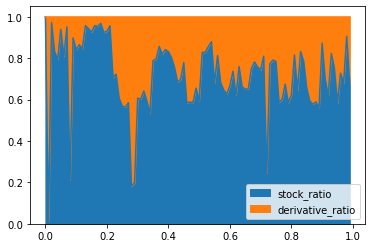

In [48]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') # For Windows
%matplotlib inline
aa = pd.DataFrame(stock_ratio, p)
aa['derivative_ratio'] = derivative_ratio
aa = aa.round(5)
aa.columns = ['stock_ratio', 'derivative_ratio']
aa.plot.area()